In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('new.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
for col in df.columns:
    temp = df[col].isnull().sum()
    if temp > 0:
        print(f'kolom {col} berisi {temp} nilai null')

kolom Income berisi 24 nilai null


In [8]:
df = df.dropna()
print("Total nilai yang tersisa:", len(df))

Total nilai yang tersisa: 2216


In [9]:
df.nunique()

ID                     2216
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             662
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         554
MntFishProducts         182
MntSweetProducts        176
MntGoldProds            212
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [10]:
parts = df["Dt_Customer"].str.split("-", n=3, expand=True)
df["day"] = parts[0].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[2].astype('int')

In [ ]:
#alternatif
#df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
#df["day"] = df["Dt_Customer"].dt.day
#df["month"] = df["Dt_Customer"].dt.monthy
#df["year"] = df["Dt_Customer"].dt.year

In [11]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1, inplace=True)

In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,day,month,year
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,1,4,9,2012
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,0,8,3,2014
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,0,21,8,2013
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,0,10,2,2014
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,0,19,1,2014


In [13]:
objects = df.select_dtypes(include='object').columns.tolist()
floats = df.select_dtypes(include='float').columns.tolist()

print("Kolom bertipe object:", objects)
print("Kolom bertipe float:", floats)

Kolom bertipe object: ['Education', 'Marital_Status']
Kolom bertipe float: ['Income']


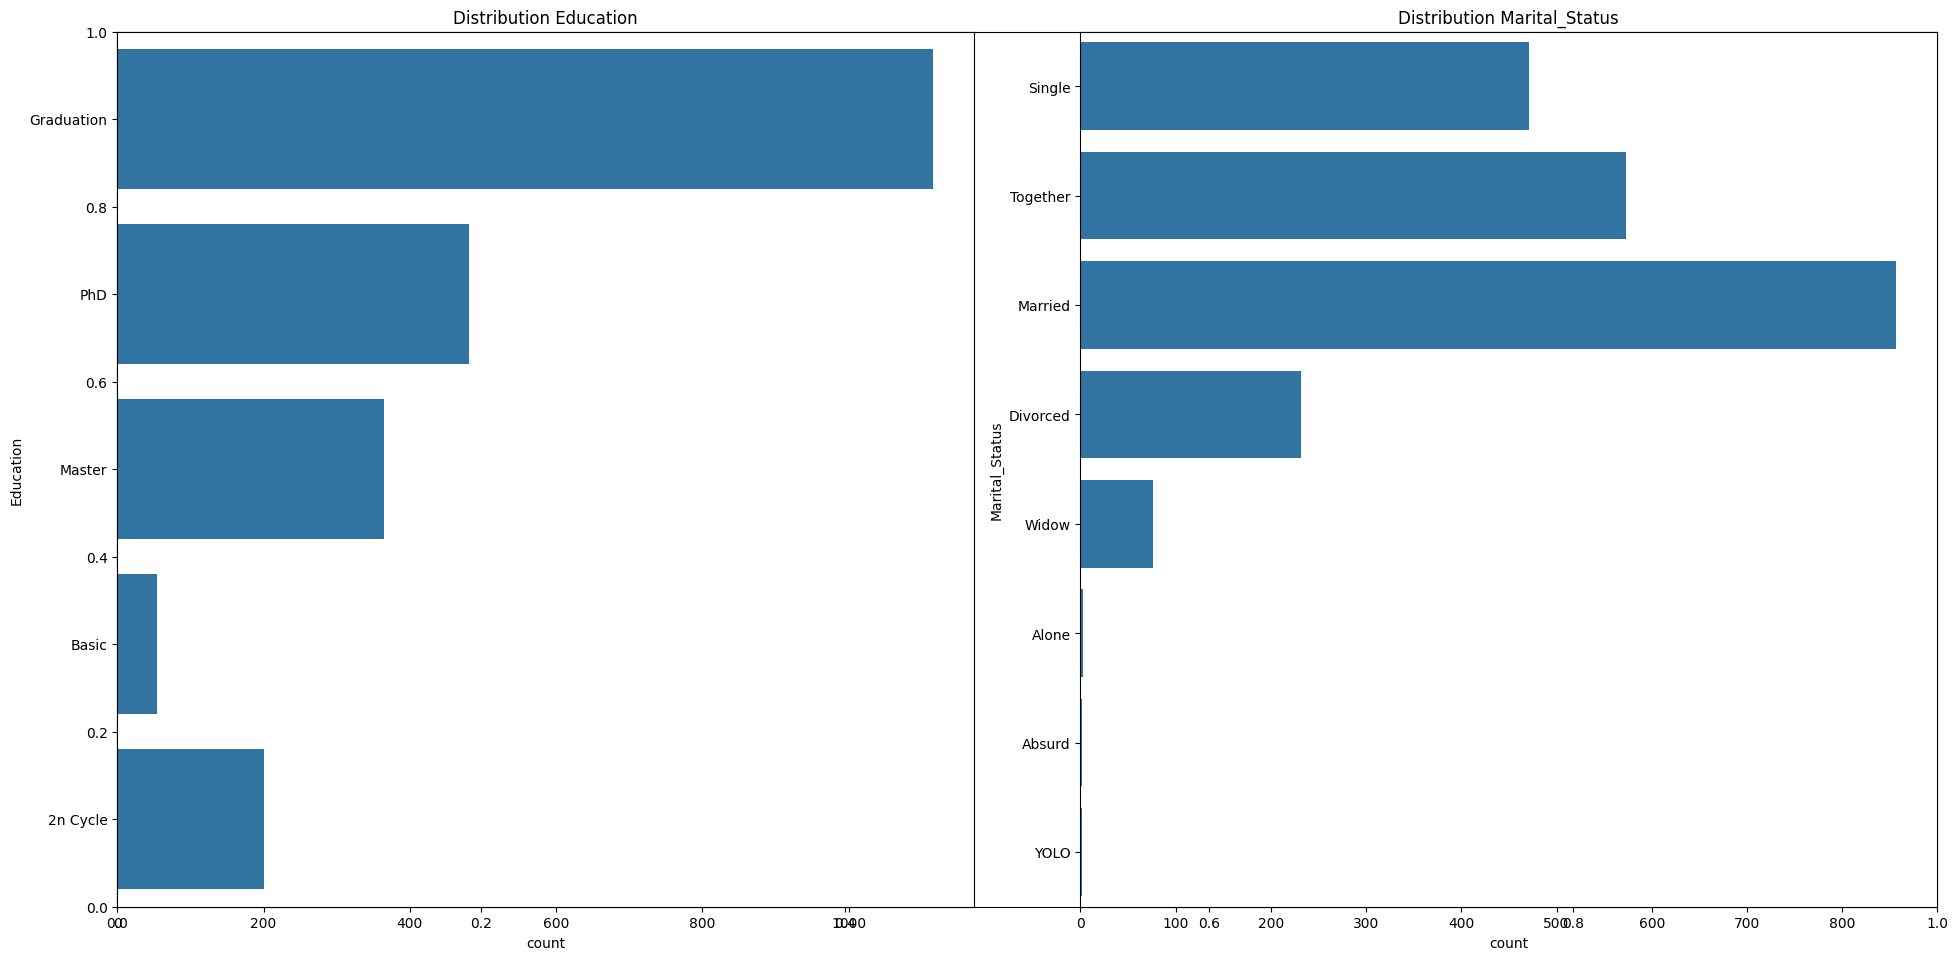

In [14]:
plt.subplots(figsize=(20, 10))
for i, col in enumerate(objects):
    plt.subplot(1, 2, i + 1)
    sn.countplot(df[col])
    plt.title(f"Distribution {col}")
plt.tight_layout()
plt.show()

In [15]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

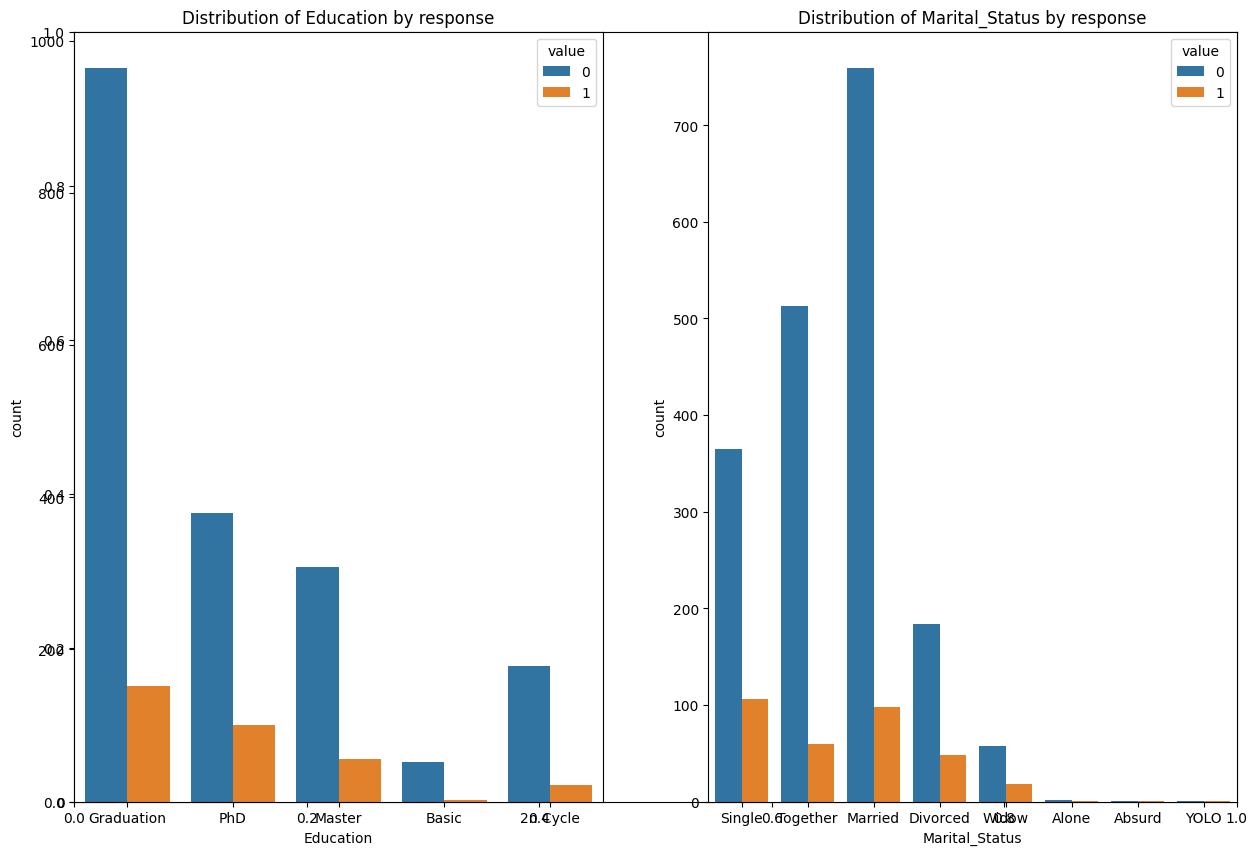

In [16]:
plt.subplots(figsize=(15, 10))
for i, col in enumerate(objects):
    plt.subplot(1, 2, i + 1)
    df_melted = df.melt(id_vars=[col], 
                        value_vars=['Response'], 
                        var_name='hue')
    sn.countplot(x=col, hue='value', data=df_melted)
    plt.title(f"Distribution of {col} by response")
plt.show()

In [17]:
for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [18]:
df[col]

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2235    2013
2236    2014
2237    2014
2238    2014
2239    2012
Name: year, Length: 2216, dtype: int32

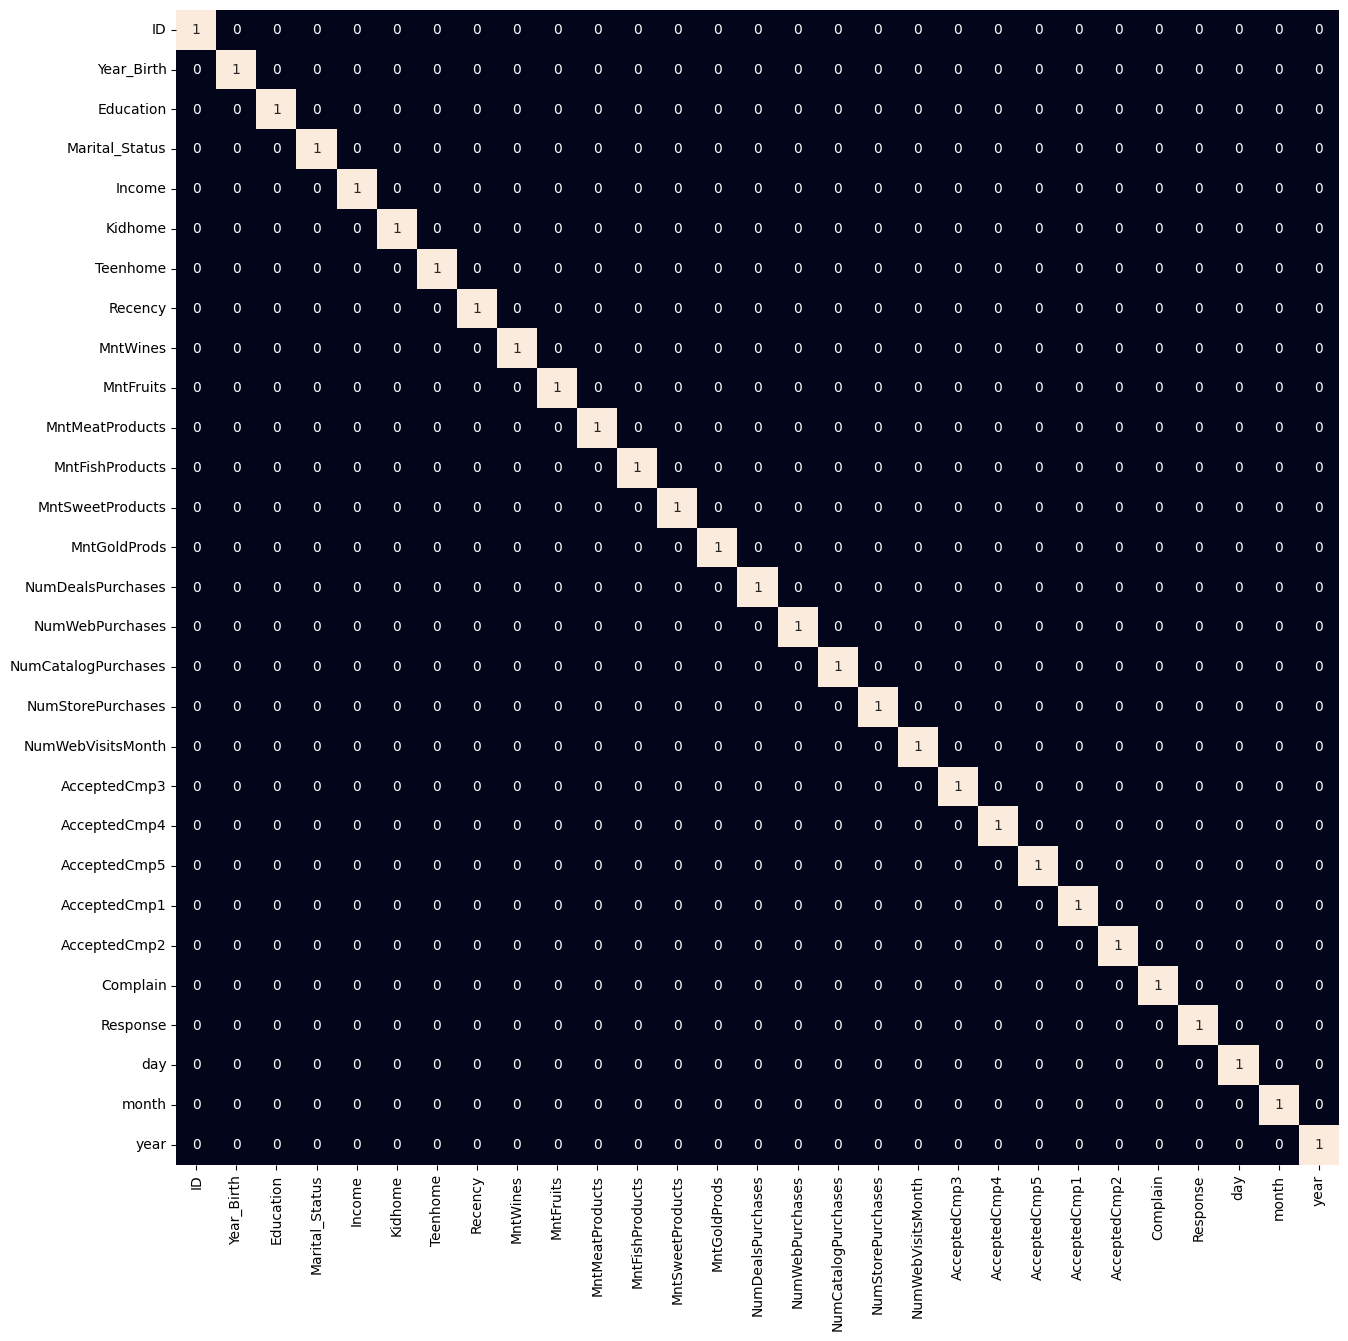

In [19]:
plt.figure(figsize=(15, 15))
sn.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

scaled_df = pd.DataFrame(data_scaled, columns=df.columns)
print(scaled_df)

            ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0    -0.019809   -0.986443  -0.350527        0.254218  0.234063 -0.823039   
1    -1.051009   -1.236801  -0.350527        0.254218 -0.234559  1.039938   
2    -0.445526   -0.318822  -0.350527        1.182303  0.769478 -0.823039   
3     0.182737    1.266777  -0.350527        1.182303 -1.017239  1.039938   
4    -0.081373    1.016420   1.429011       -0.673866  0.240221  1.039938   
...        ...         ...        ...             ...       ...       ...   
2211  1.625801   -0.151917  -0.350527       -0.673866  0.356642 -0.823039   
2212 -0.488620   -1.904422   1.429011        1.182303  0.467539  2.902916   
2213  0.517646    1.016420  -0.350527       -1.601951  0.188091 -0.823039   
2214  0.814693   -1.069896   0.539242        1.182303  0.675388 -0.823039   
2215  1.174843   -1.236801   1.429011       -0.673866  0.024705  1.039938   

      Teenhome   Recency  MntWines  MntFruits  ...  AcceptedCmp3  \
0    -0

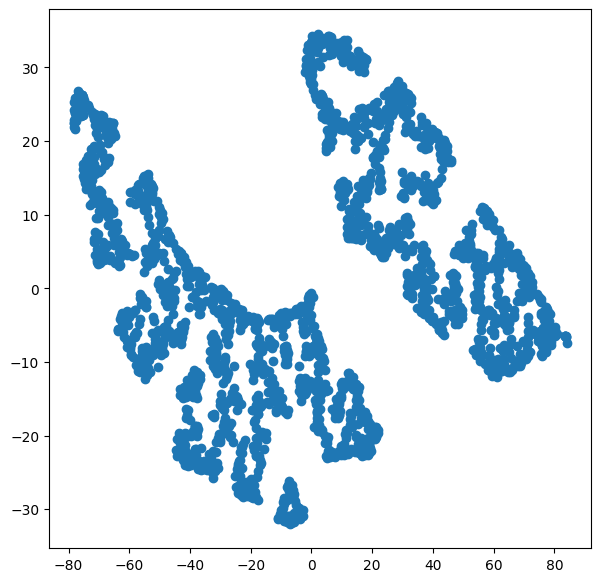

In [21]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(df)
plt.figure(figsize=(7,7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [22]:
error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                  n_clusters = n_clusters,
                  max_iter = 500,
                  random_state = 22)
    model.fit(df)
    error.append(model.inertia_)

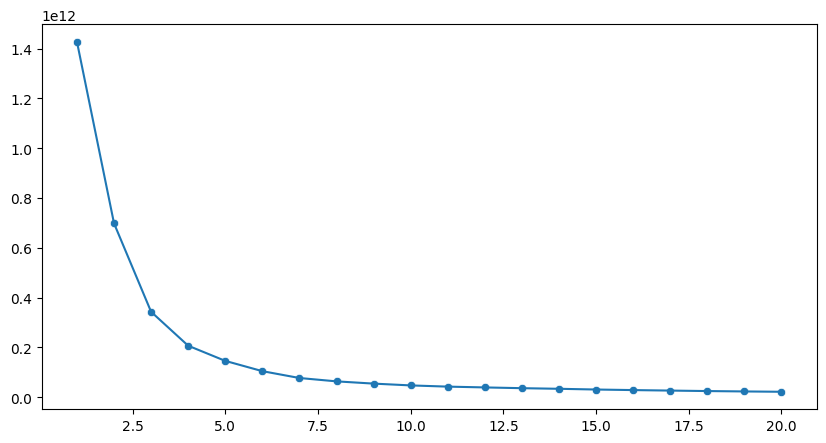

In [23]:
plt.figure(figsize=(10, 5))
sn.lineplot(x=range(1, 21), y=error)
sn.scatterplot(x=range(1, 21), y=error)
plt.show()

In [24]:
# create clustering model with optimal k=5
model = KMeans(init='k-means++',
               n_clusters=5,
               max_iter=500,
               random_state=22)
segments = model.fit_predict(df)

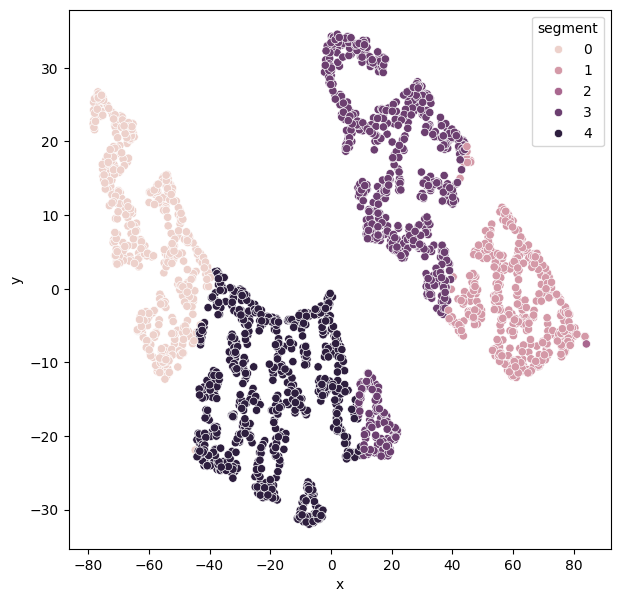

In [25]:
plt.figure(figsize=(7, 7))
df_tsne = pd.DataFrame({'x': tsne_data[:, 0], 
                        'y': tsne_data[:, 1], 
                        'segment': segments})
sn.scatterplot(x='x', y='y', hue='segment', data=df_tsne)
plt.show()